In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor

from vol_predict.models.dl.lstm_predictor import LSTMPredictor as Model
from vol_predict.models.dl.mlp_predictor import MLPPredictor as Baseline

from run import initialize_runner, run_backtest

In [81]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.SPX
config.ASSET_UNIVERSE = ("spx",)

model_params = ModelConfig()
baseline_params = ModelConfig()

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Train data on 2004-03-23 00:00:00 to 2020-12-31 00:00:00
Test data on 2022-01-04 00:00:00 to 2025-01-28 00:00:00
Num Train Iterations: 4225
Num Features: 23


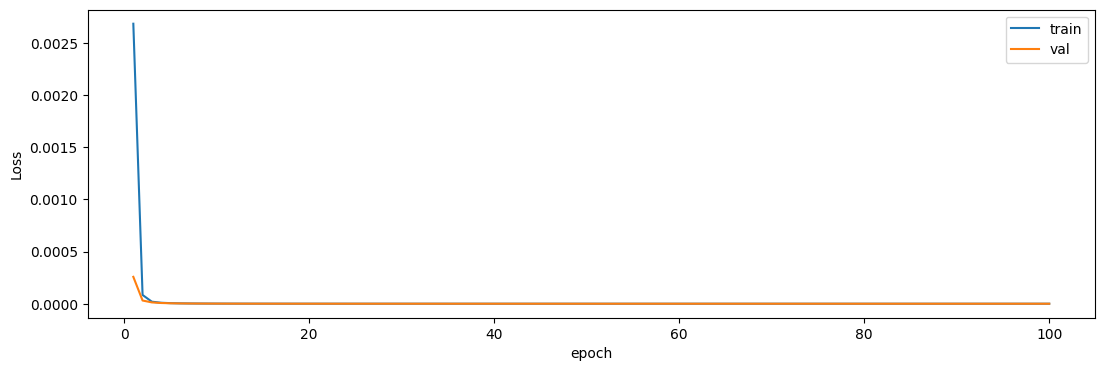

In [82]:
model_params.n_epochs = 100
model_params.hidden_size = 128 * 2
model_params.n_layers = 2
model_params.n_features = 23 + 1
model_params.batch_size = 16
model_params.optimizer = torch.optim.Adam

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    model_config=model_params,
    baseline_config=baseline_params,
    runner=runner,
)

In [83]:
result.model_result

AssessmentResult:
* mean_model_loss = 0.000000
* mean_val_loss = 0.000000
* MSELoss = 0.000122122176

In [84]:
result.baseline_result

AssessmentResult:
* mean_model_loss = 0.000000
* mean_val_loss = 0.000000
* MSELoss = 0.000121262237